In [184]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,8)})

df = pd.read_csv('/Users/peter/Downloads/glass.csv')
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [162]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [163]:
df.Type.nunique()

6

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Предобработка данных
* Построили для каждой фичи боксплоты, отмечаем в каких фичах наибольшее количество выбросов.
* В ЗП удаляем все что выше максимальной цены <b> (неприменимо, тк Type - номинативная переменная) </b>
* Обозначаем какие переменные какое имеют распределение
* Строим тепловую карту из матрицы корреляции между всеми переменными
* Находим фичи, которые имеют между собой очень высокую корреляцию (пары) и оставляем только одну из пары (мультиколлинеарность, сокращение размерности). 
* После этого находим какие переменные имеют наибольшую корреляцию с ЗП
* Cохраняем эти переменные вместе с ЗП в отдельны датафрейм
* Нормализуем данные с помощью мин макс скейлер
* Строим корреляции для нормализованного датафрейма из НП



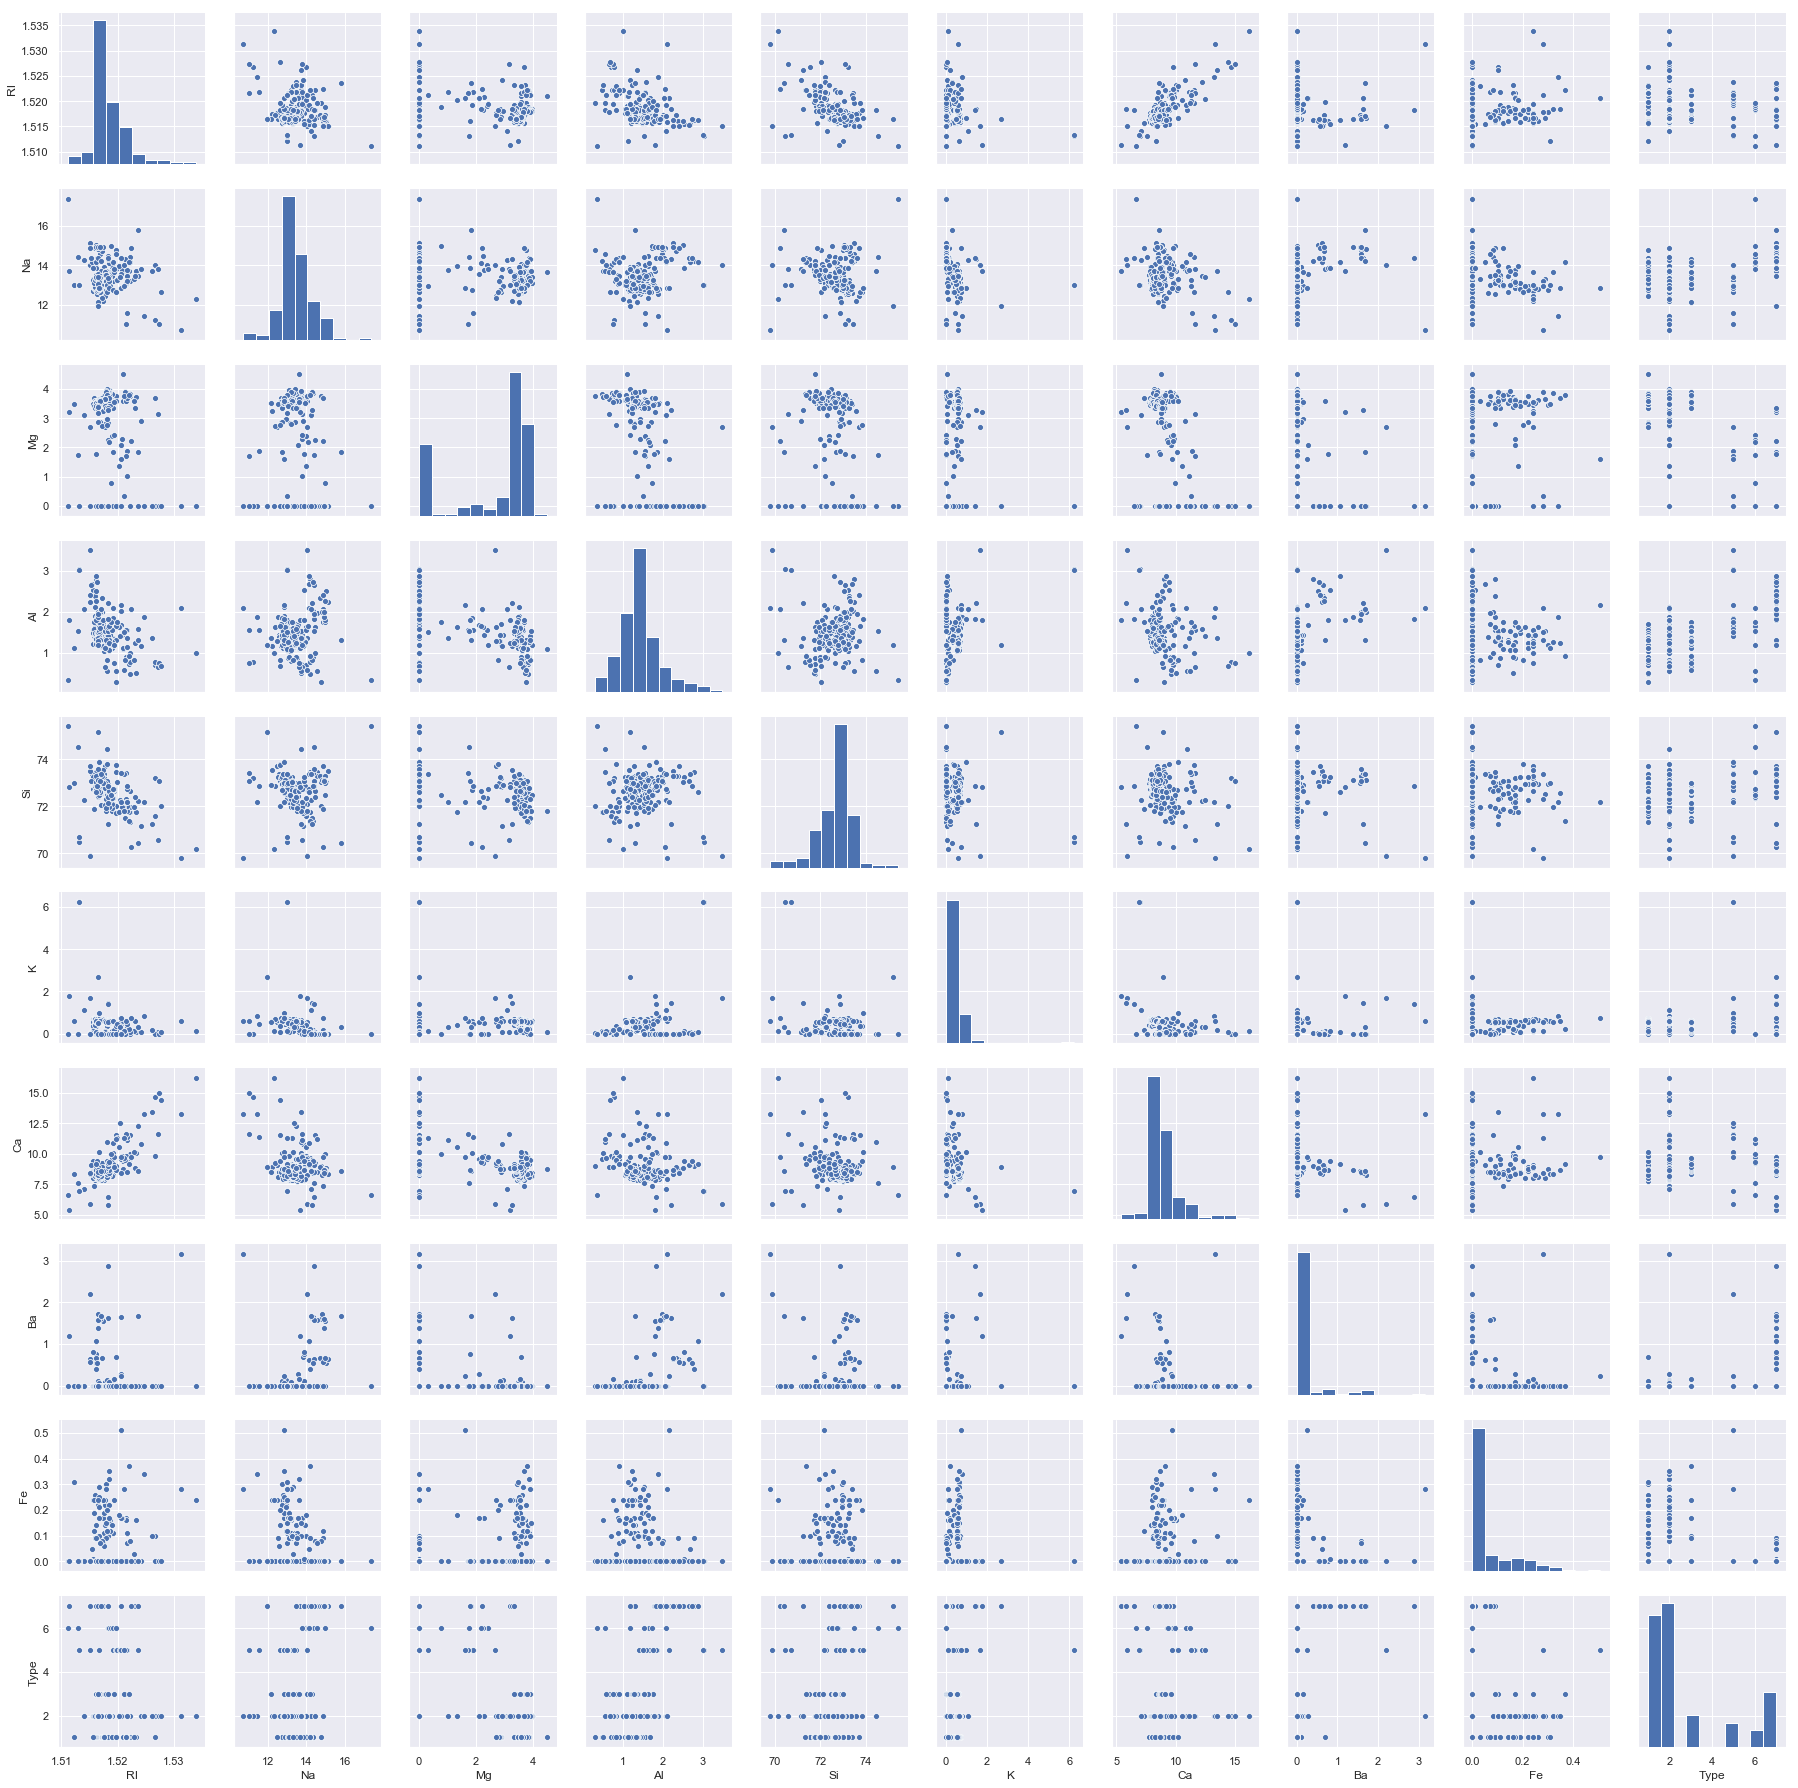

In [165]:
sns.pairplot(df)

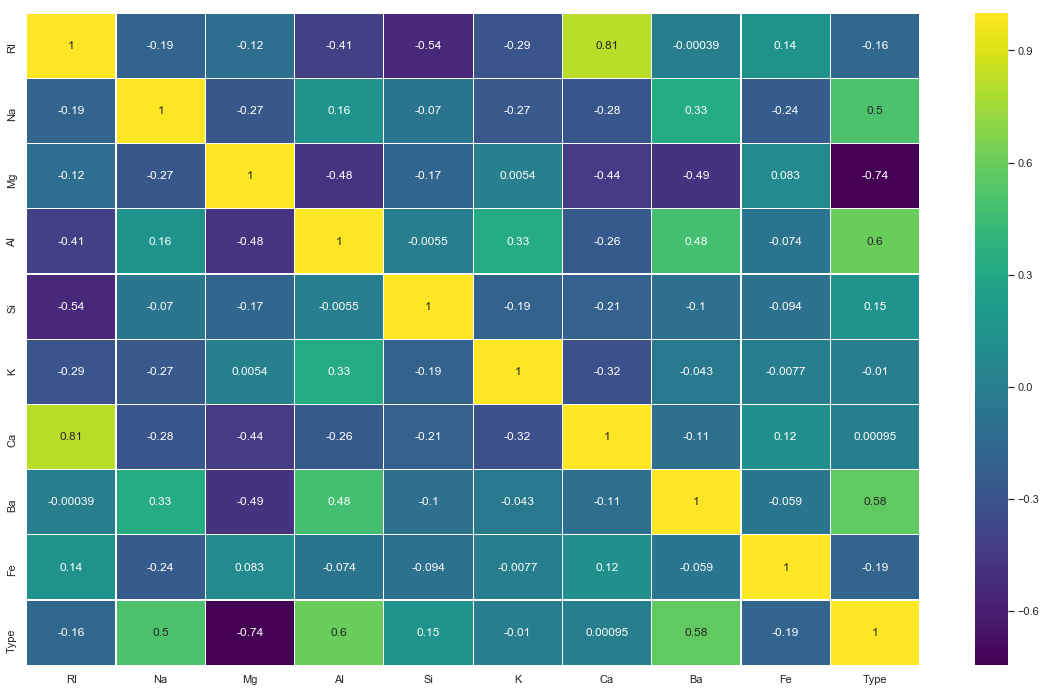

In [166]:
#Для сокращения размерности, найдем фичи которые имеют между собой сильную линейную зависимость
mtrx = df.corr()
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)

In [70]:
print(sorted(abs(mtrx['Type'])))

[0.0009522245641598143, 0.010054463765355268, 0.15156525792393763, 0.16423721461666757, 0.1882775639558429, 0.5028980422746069, 0.5751614590134174, 0.5988292084327757, 0.7449928875020336, 1.0]


In [81]:
mtrx.query('Type >= 0.5 | Type <= -0.5').iloc[:,-1]

#Не будем выкидывать фичи с небольшой корреляцией между Type и фичей.
#Но проверим не имееют ли НП сильную корреляцию между собой
# У Mg высокая корреляция с Ba, оставим только Mg и сформируем новый датасет

Na      0.502898
Mg     -0.744993
Al      0.598829
Ba      0.575161
Type    1.000000
Name: Type, dtype: float64

In [185]:
df = df.drop(['Ba'], axis = 1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [186]:
print(np.shape(df))

(214, 9)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


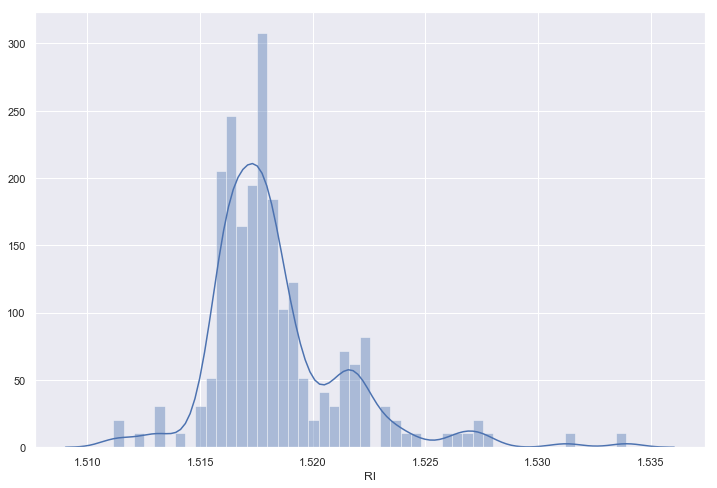

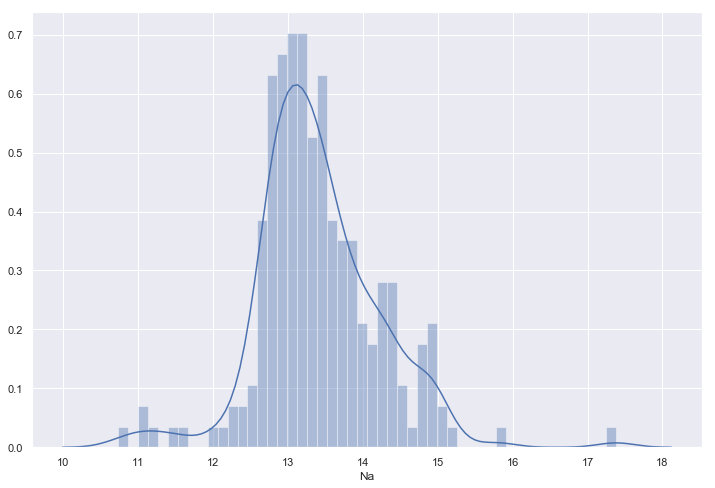

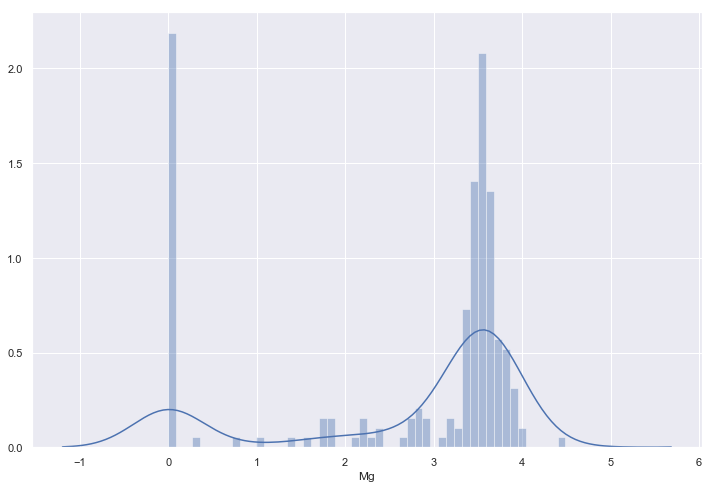

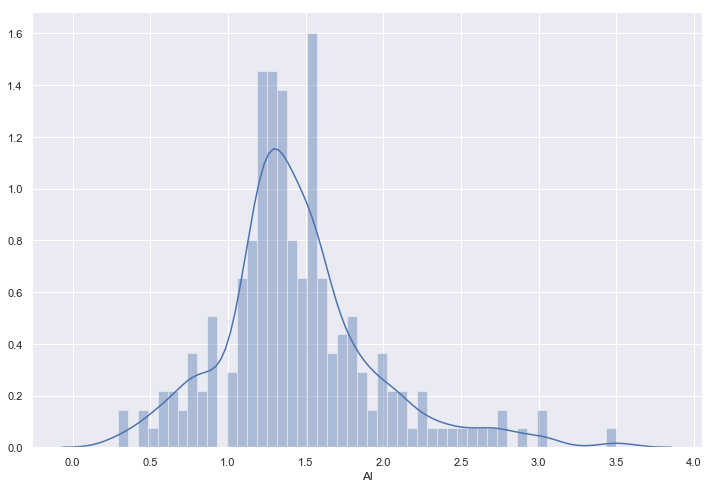

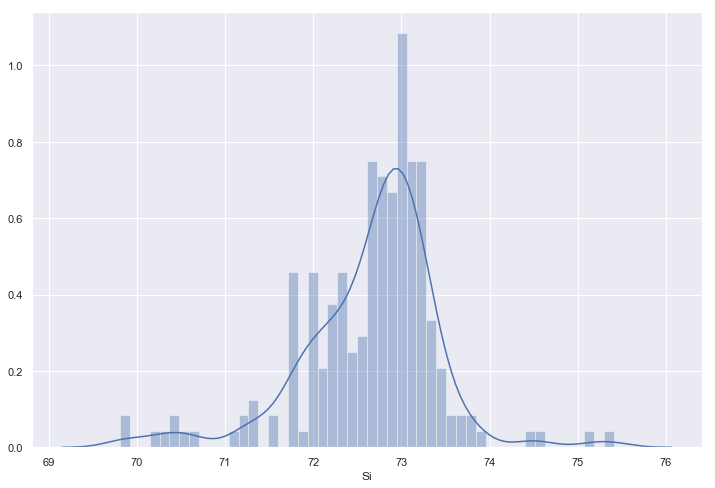

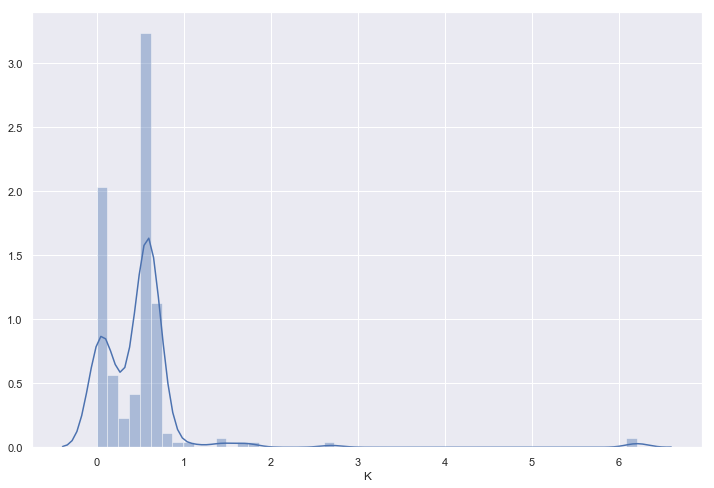

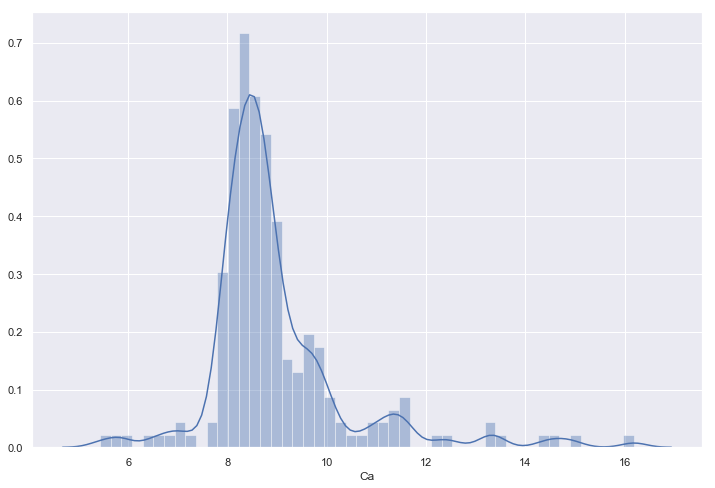

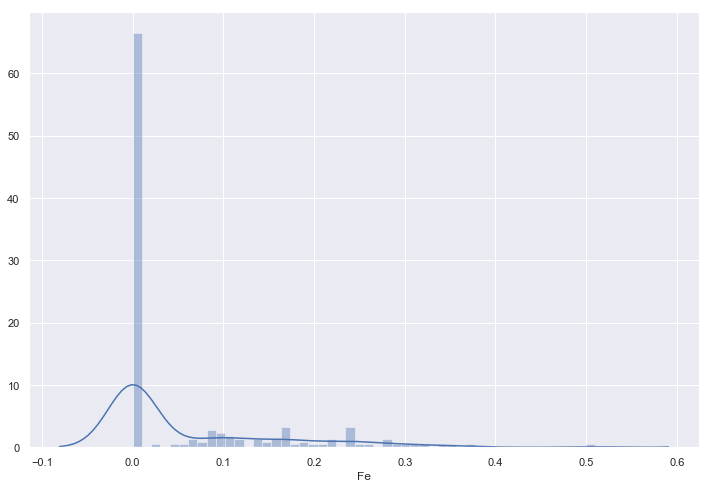

In [187]:
#Построим графики плотности распределения по всем переменным
#Не похоже, что данные распределены нормально, у всех фич есть skew и выбросы

features = df.columns[:-1].tolist()
for feat in features:
    sns.distplot(df[feat], kde= True, bins=50)
    plt.show()

In [210]:
from collections import Counter
def outlier_hunt(df):
    outlier_indices = []
    
    # Идем в цикле по столбцам(фичам) в датафрейме
    for col in df.columns.tolist():
        # 1й квартиль для столбца
        Q1 = np.percentile(df[col], 25)
        
        # 3й квартиль для столбца
        Q3 = np.percentile(df[col],75)
        
        # Межквартильный размах
        IQR = Q3 - Q1
        
        #Присываиваем outlier_list_col значения индекса, где найден выброс
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR )].index
        
        
        #Добавляем индекс строки в которой находится выброс в список
        outlier_indices.extend(outlier_list_col)
        
      
    #Составляем словарь {номер индекса строки: количество выбросов}
    outlier_indices = Counter(outlier_indices)
    
    #Проходимся по словарю и оставляем те индексы(ключи) в которых кол-во выбросов больше 2(значения)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    #Возвращаем список индексов строк, в которых 3 и больше выбросов.
    return multiple_outliers

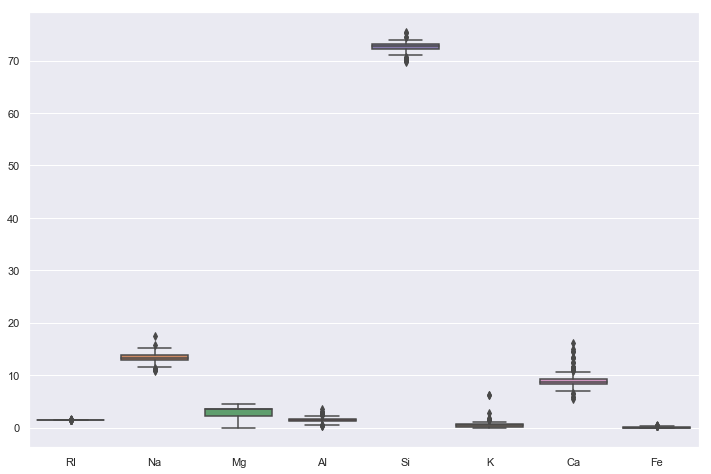

In [189]:
#Построим боксплоты и посмотрим на средние значение по признакам, наиболее выделяется кремний
#Что логично, потому что он содержатится в любом типе стекла.
sns.boxplot(data=df.iloc[:,0:-1])

In [190]:
#Удалим выбросы и посмотрим, как изменилось количество наблюдений в датасете
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(202, 9)


In [172]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IndexError: index 6 is out of bounds for axis 0 with size 6

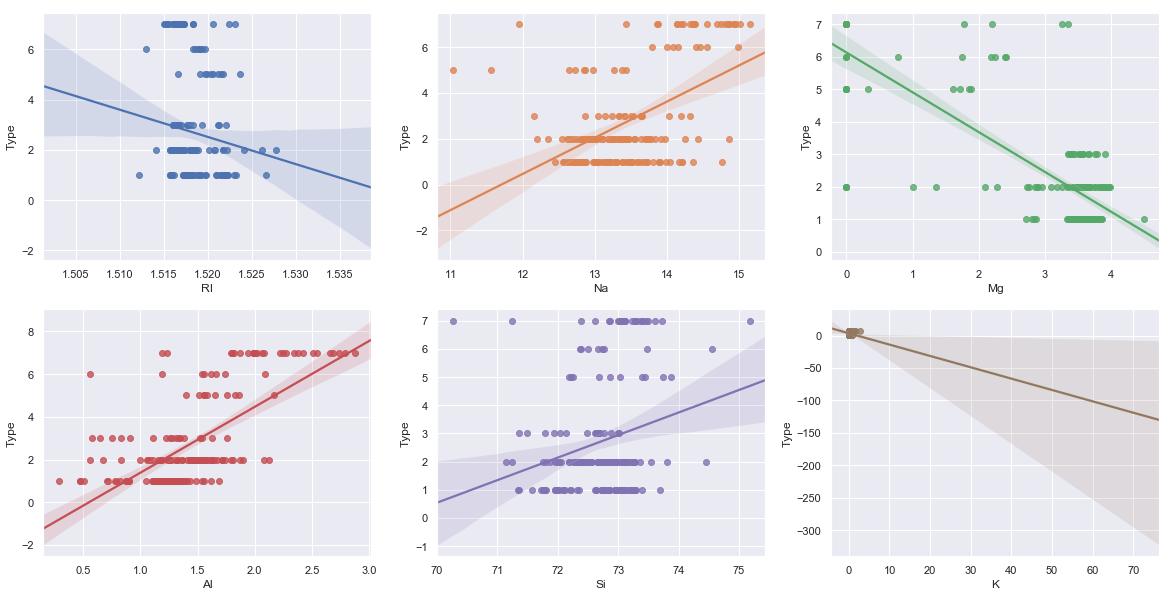

In [200]:
#Нормализуем данные с помощью мин макс скейлер
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = df.iloc[:,:-1]
y = df.Type
fig,axs = plt.subplots(ncols=3, nrows=2, figsize = (20,10))
index = 0
axs = axs.flatten()
for i,k in enumerate(df.columns[:-1]):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layot(pad=0.4, w_pad=0.5, h_pad=5.0)

In [215]:
#Сильная положительная взаимосвязь: Na, Type; Al,Type;
#Сильная обратная отрициательная взаимосвязь: Ri,Type; Mg,Type;